In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 

## description preprocessing function and variables

In [58]:
def remove_emoji_andN(input_string):
    result = str(input_string).replace('\n', ' ')
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F700-\U0001F77F"
                           u"\U0001F780-\U0001F7FF"
                           u"\U0001F800-\U0001F8FF"
                           u"\U0001F900-\U0001F9FF"
                           u"\U0001FA00-\U0001FA6F"
                           u"\U0001FA70-\U0001FAFF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', result)

In [59]:
tool_keywords1 = set(['python', 'pytorch', 'sql', 'mxnet', 'mlflow', 'einstein', 'theano', 'pyspark', 'solr', 'mahout',
 'cassandra', 'aws', 'powerpoint', 'spark', 'pig', 'sas', 'java', 'nosql', 'docker', 'salesforce', 'scala', 'r',
 'c', 'c++', 'net', 'tableau', 'pandas', 'scikitlearn', 'sklearn', 'matlab', 'scala', 'keras', 'tensorflow', 'clojure',
 'caffe', 'scipy', 'numpy', 'matplotlib', 'vba', 'spss', 'linux', 'azure', 'cloud', 'gcp', 'mongodb', 'mysql', 'oracle',
 'redshift', 'snowflake', 'kafka', 'javascript', 'qlik', 'jupyter', 'perl', 'bigquery', 'unix', 'react',
 'scikit', 'powerbi', 's3', 'ec2', 'lambda', 'ssrs', 'kubernetes', 'hana', 'spacy', 'tf', 'django', 'sagemaker',
 'seaborn', 'mllib', 'github', 'git', 'elasticsearch', 'splunk', 'airflow', 'looker', 'rapidminer', 'birt', 'pentaho',
'jquery', 'nodejs', 'd3', 'plotly', 'bokeh', 'xgboost', 'rstudio', 'shiny', 'dash', 'h20', 'h2o', 'hadoop', 'mapreduce',
 'hive', 'cognos', 'angular', 'nltk', 'flask', 'node', 'firebase', 'bigtable', 'rust', 'php', 'cntk', 'lightgbm',
 'kubeflow', 'rpython', 'unixlinux', 'postgressql', 'postgresql', 'postgres', 'hbase', 'dask', 'ruby', 'julia', 'tensor',
 'dplyr','ggplot2','esquisse','bioconductor','shiny','lubridate','knitr','mlr','quanteda','dt','rcrawler','caret','rmarkdown',
 'leaflet','janitor','ggvis','plotly','rcharts','rbokeh','broom','stringr','magrittr','slidify','rvest',
 'rmysql','rsqlite','prophet','glmnet','text2vec','snowballc','quantmod','rstan','swirl','datasciencer',
                 ])

tool_keywords2 = set(['amazon web services', 'google cloud', 'sql server'])

skill_keywords1 = set(['cleansing', 'chatbot', 'cleaning', 'blockchain', 'causality', 'correlation', 'bandit', 'anomaly', 'kpi',
 'dashboard', 'geospatial', 'ocr',  'pca', 'gis', 'svm', 'svd', 'tuning', 'hyperparameter', 'hypothesis',
 'salesforcecom', 'segmentation', 'biostatistics', 'unsupervised', 'supervised', 'exploratory',
 'recommender', 'recommendations', 'research', 'sequencing', 'probability', 'reinforcement', 'graph', 'bioinformatics',
  'knn', 'etl', 'normalization', 'classification', 'optimizing', 'prediction', 'forecasting',
 'clustering', 'optimization', 'visualization', 'nlp', 'c#',
 'regression', 'logistic', 'cnn', 'glm',
 'rnn', 'lstm', 'gbm', 'boosting', 'recurrent', 'convolutional', 'bayesian',
 'bayes'])

skill_keywords2 = set(['random forest', 'natural language processing', 'machine learning', 'decision tree', 'deep learning', 'experimental design',
 'time series', 'nearest neighbors', 'neural network', 'support vector machine', 'computer vision', 'machine vision', 'dimensionality reduction',
 'text analytics', 'power bi', 'a/b testing', 'ab testing', 'chat bot', 'data mining'])

In [60]:
def count_skill_keywords(text, keyword_set1, keyword_set2):
    text_1 = re.sub(r'[^a-zA-Z\s]', '', text).lower().split() #for single word
    text_2 = re.sub(r'[^a-zA-Z\s]', '', text).lower() #for word combinations

    #for single word
    matching_words = set(text_1) & keyword_set1
    count_matching_words = len(matching_words)

    #for word combinations
    keyword_pattern = re.compile('|'.join(re.escape(keyword) for keyword in keyword_set2))
    matches = keyword_pattern.findall(text_2)

    return len(set(matches)) + count_matching_words

## Key word preprocessing for the merged dataset

### To see the frequency of each key word in the whole combined description

In [61]:
skill_keywords = skill_keywords1.union(skill_keywords2)
skill_word_counts = {word: merged_df['Description'].str.count(word).sum() for word in skill_keywords}

skill_keyword_freq = pd.DataFrame(list(word_counts.items()), columns=['skill_keyword_freq', 'Count'])

print(skill_keyword_freq)

tool_keywords = tool_keywords1.union(tool_keywords2)
tool_word_counts = {word: merged_df['Description'].str.count(word).sum() for word in tool_keywords}

tool_keyword_freq = pd.DataFrame(list(word_counts.items()), columns=['tool_keyword_freq', 'Count'])

print(tool_keyword_freq)

### To calculate the frequency of a single keyword for each row:

In [62]:
total_keywords = tool_keywords.union(skill_keywords)

for keyword in total_keywords:
    merged_df[keyword] = merged_df['Description'].apply(lambda x: x.lower().count(keyword.lower()))

print(merged_df)

### To check the correlation

In [63]:
merged_df_2 = merged_df.drop(['Description', 'Title', 'Company Name', 'City', 'State'], axis=1)

salary_column = merged_df_2['Salary']
correlations = merged_df_2.corrwith(salary_column)


sorted_correlations = correlations.abs().sort_values(ascending=False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(sorted_correlations)

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

## Jobspikr dataset

This dataset contains exclusively data science jobs from 2019

In [64]:
Jobspikr = pd.read_csv('/Users/chris/Downloads/datasets/datasets/data_scientist_united_states_job_postings_jobspikr.csv', engine='python')

In [65]:
# Drop rows with missing values in specified columns
Jobspikr = Jobspikr.dropna(subset=['salary_offered', 'city', 'state'])

# Filter by job type
Jobspikr = Jobspikr[Jobspikr['job_type'] == 'Full Time']

# Select relevant columns
Jobspikr = Jobspikr[['job_title', 'job_description', 'company_name', 'city', 'state', 'post_date', 'salary_offered']]

# Define a regular expression pattern for salary extraction
salary_pattern = r'\$([\d,]+)[Kk]?\s*-\s*\$([\d,]+)[Kk]?'

# Extract and preprocess salaries
def process_salary_string(salary_str):
    match = re.search(salary_pattern, salary_str)
    if match:
        lower_salary, upper_salary = map(lambda x: float(x.replace(',', '')), match.groups())
    else:
        numeric_values = [float(val.replace(',', '')) for val in re.findall(r'\b[\d,]+\b', salary_str)][:2]
        lower_salary, upper_salary = numeric_values if len(numeric_values) == 2 else (None, None)
    return lower_salary, upper_salary

# Apply the function to extract and preprocess salaries
Jobspikr['lower_salary'], Jobspikr['upper_salary'] = zip(*Jobspikr['salary_offered'].map(process_salary_string))

# Create a new column 'approximated_salary'
Jobspikr['approximated_salary'] = Jobspikr[['lower_salary', 'upper_salary']].mean(axis=1).apply(lambda x: int(str(x).split('.')[0][:3]) if pd.notna(x) else x)

# Drop unnecessary columns
Jobspikr = Jobspikr.drop(columns=['salary_offered', 'lower_salary', 'upper_salary'])

# Drop rows with missing values in the new column
Jobspikr = Jobspikr.dropna(subset=['approximated_salary'])

# Convert 'post_date' to datetime format
Jobspikr['post_date'] = pd.to_datetime(Jobspikr['post_date'])

# Extract year, month, and day into separate columns
Jobspikr[['year', 'month', 'day']] = Jobspikr['post_date'].apply(lambda x: pd.Series([x.year, x.month, x.day]))

# Drop the original 'post_date' column
Jobspikr = Jobspikr.drop(columns=['post_date'])


# Rename columns
Jobspikr = Jobspikr.rename(columns={
    'job_title': 'Title',
    'job_description': 'Description',
    'company_name': 'Company Name',
    'city': 'City',
    'state': 'State',
    'year': 'Year',
    'month': 'Month',
    'day': 'Day',
    'approximated_salary': 'Salary'
}).reset_index(drop=True)

Jobspikr['Salary'] = (Jobspikr['Salary'] * 1000).round()


In [66]:
Jobspikr

,Title,Description,Company Name,City,State,Salary,Year,Month,Day
0,Data Scientist - Cross Asset Desk Strategist T...,DESCRIPTION Morgan Stanley's business around t...,Morgan Stanley,New York,NY,90000,2019,8,20
1,Senior Data Scientist - Infectious Disease and...,Job Req ID: 204549 Position Number: 00167522 E...,Carolinas HealthCare System,Charlotte,NC,125000,2019,9,6
2,"Senior Data Scientist, Advanced Marketing Anal...",Spotify is seeking a Senior Data Scientist to ...,Spotify,New York,NY,125000,2019,8,23
3,"TV Data Scientist in Burlington, MA",Our services power people-based customer exper...,LiveRamp,Burlington,MA,125000,2019,8,2
4,"TV Data Scientist in Burlington, MA",ABOUT THIS JOB TV is one of the key growth are...,LiveRamp,Burlington,MA,125000,2019,8,2
...,...,...,...,...,...,...,...,...,...
574,"Data Scientist in Columbus, OH","Description As the Data Scientist, you will wo...",Citizens Financial Group,Columbus,OH,90000,2019,9,28
575,"Data Scientist in Columbus, OH","Description As the Data Scientist, you will wo...",Citizens Financial Group,Columbus,OH,90000,2019,9,28
576,"Data Scientist in Arlington, VA",Data Scientist A Data Science firm in the D.C....,Jobspring,Arlington,VA,115000,2019,9,28
577,"Staff Engineer, Data Scientist in Mountain Vie...",Artificial intelligence is revolutionizing the...,Omnicell,Mountain View,CA,175000,2019,9,27


### Description Preprocessing

In [67]:
Jobspikr['description'] = Jobspikr['Title'] + ' ' + Jobspikr['Description']
Jobspikr = Jobspikr.drop(['Description'], axis=1)

In [68]:
Jobspikr['description'] = Jobspikr['description'].map(remove_emoji_andN)

In [69]:
Jobspikr['skill_keywords'] = Jobspikr.apply(lambda row: count_skill_keywords(row['description'], skill_keywords1, skill_keywords2), axis=1)
Jobspikr['tool_keywords'] = Jobspikr.apply(lambda row: count_skill_keywords(row['description'], tool_keywords1, tool_keywords2), axis=1)

In [70]:
Jobspikr = Jobspikr[['Title', 'description', 'Company Name', 'City', 'State', 'Salary', 'Year', 'Month', 'Day', 'skill_keywords', 'tool_keywords']]
fix_description_column_name= {
    'description': 'Description',
}
Jobspikr = Jobspikr.rename(columns=fix_description_column_name)
Jobspikr

,Title,Description,Company Name,City,State,Salary,Year,Month,Day,skill_keywords,tool_keywords
0,Data Scientist - Cross Asset Desk Strategist T...,Data Scientist - Cross Asset Desk Strategist T...,Morgan Stanley,New York,NY,90000,2019,8,20,1,1
1,Senior Data Scientist - Infectious Disease and...,Senior Data Scientist - Infectious Disease and...,Carolinas HealthCare System,Charlotte,NC,125000,2019,9,6,3,2
2,"Senior Data Scientist, Advanced Marketing Anal...","Senior Data Scientist, Advanced Marketing Anal...",Spotify,New York,NY,125000,2019,8,23,6,5
3,"TV Data Scientist in Burlington, MA","TV Data Scientist in Burlington, MA Our servic...",LiveRamp,Burlington,MA,125000,2019,8,2,5,8
4,"TV Data Scientist in Burlington, MA","TV Data Scientist in Burlington, MA ABOUT THIS...",LiveRamp,Burlington,MA,125000,2019,8,2,5,8
...,...,...,...,...,...,...,...,...,...,...,...
574,"Data Scientist in Columbus, OH","Data Scientist in Columbus, OH Description As ...",Citizens Financial Group,Columbus,OH,90000,2019,9,28,5,0
575,"Data Scientist in Columbus, OH","Data Scientist in Columbus, OH Description As ...",Citizens Financial Group,Columbus,OH,90000,2019,9,28,5,0
576,"Data Scientist in Arlington, VA","Data Scientist in Arlington, VA Data Scientist...",Jobspring,Arlington,VA,115000,2019,9,28,2,6
577,"Staff Engineer, Data Scientist in Mountain Vie...","Staff Engineer, Data Scientist in Mountain Vie...",Omnicell,Mountain View,CA,175000,2019,9,27,6,3


## Glassdoor dataset

Data Science Job Posting on Glassdoor. Job post years are not available.

In [71]:
Glassdoor = pd.read_csv('/Users/chris/Downloads/datasets/datasets/Data Science Job Posting on Glassdoor/Uncleaned_DS_jobs.csv', engine='python')

In [72]:
Glassdoor

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


In [73]:
# Drop rows with missing values in specified columns
Glassdoor = Glassdoor.dropna(subset=['Salary Estimate', 'Location', 'Company Name'])

# Define a regular expression pattern for salary extraction
salary_pattern = r'\$([\d,]+)[Kk]?\s*-\s*\$([\d,]+)[Kk]?'

# Extract and preprocess salaries
def process_salary_string(salary_str):
    match = re.search(salary_pattern, salary_str)
    if match:
        lower_salary, upper_salary = map(lambda x: float(x.replace(',', '')), match.groups())
    else:
        numeric_values = [float(val.replace(',', '')) for val in re.findall(r'\b[\d,]+\b', salary_str)][:2]
        lower_salary, upper_salary = numeric_values if len(numeric_values) == 2 else (None, None)
    return lower_salary, upper_salary

# Apply the function to extract and preprocess salaries
Glassdoor['lower_salary'], Glassdoor['upper_salary'] = zip(*Glassdoor['Salary Estimate'].map(process_salary_string))

# Create a new column 'approximated_salary'
Glassdoor['approximated_salary'] = Glassdoor[['lower_salary', 'upper_salary']].mean(axis=1).apply(lambda x: int(str(x).split('.')[0][:3]) if pd.notna(x) else x)

# Drop unnecessary columns
Glassdoor = Glassdoor.drop(columns=['Salary Estimate', 'lower_salary', 'upper_salary'])

# Drop rows with missing values in the new column
Glassdoor = Glassdoor.dropna(subset=['approximated_salary'])

# Reset the index to have consecutive indices
Glassdoor = Glassdoor.reset_index(drop=True)

# Select relevant columns
Glassdoor = Glassdoor[['Job Title', 'Job Description', 'Company Name', 'Location','approximated_salary']]

# Split 'Location' into 'City' and 'State' columns
location_split = Glassdoor['Location'].str.split(', ', expand=True)
Glassdoor['City'] = location_split[0]
Glassdoor['State'] = location_split[1]
Glassdoor = Glassdoor.dropna(subset=['State'])

# Drop the original 'Location' column
Glassdoor = Glassdoor.drop(columns=['Location'])

# Rename columns
Glassdoor = Glassdoor.rename(columns={
    'Job Title': 'Title',
    'Job Description': 'Description',
    'city': 'City',
    'state': 'State',
    'year': 'Year',
    'approximated_salary': 'Salary'
}).reset_index(drop=True)

# Add columns filled with NaN
Glassdoor['Year'] = np.nan
Glassdoor['Month'] = np.nan
Glassdoor['Day'] = np.nan

# Convert columns to Int64 type
Glassdoor['Year'] = Glassdoor['Year'].astype('Int64')
Glassdoor['Month'] = Glassdoor['Month'].astype('Int64')
Glassdoor['Day'] = Glassdoor['Day'].astype('Int64')
Glassdoor['Salary'] = Glassdoor['Salary'].astype('Int64')

# Reorder columns to match the specified order
column_order = ['Title', 'Description', 'Company Name', 'City', 'State', 'Salary', 'Year', 'Month', 'Day']
Glassdoor = Glassdoor[column_order]
Glassdoor['Salary'] = Glassdoor['Salary'].apply(lambda x: x*1000)

In [74]:
Glassdoor

,Title,Description,Company Name,City,State,Salary,Year,Month,Day
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,Healthfirst\n3.1,New York,NY,154000,<NA>,<NA>,<NA>
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",ManTech\n4.2,Chantilly,VA,154000,<NA>,<NA>,<NA>
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,Analysis Group\n3.8,Boston,MA,154000,<NA>,<NA>,<NA>
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,INFICON\n3.5,Newton,MA,154000,<NA>,<NA>,<NA>
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,Affinity Solutions\n2.9,New York,NY,154000,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...
644,Data Scientist,Summary\n\nWe’re looking for a data scientist ...,TRANZACT\n3.6,Fort Lee,NJ,136000,<NA>,<NA>,<NA>
645,Data Scientist,Job Description\nBecome a thought leader withi...,JKGT,San Francisco,CA,136000,<NA>,<NA>,<NA>
646,Data Scientist,Join a thriving company that is changing the w...,AccessHope,Irwindale,CA,136000,<NA>,<NA>,<NA>
647,Data Scientist,100 Remote Opportunity As an AINLP Data Scient...,ChaTeck Incorporated\n5.0,San Francisco,CA,136000,<NA>,<NA>,<NA>


### Description Preprocessing

In [75]:
Glassdoor['description'] = Glassdoor['Title'] + ' ' + Glassdoor['Description']
Glassdoor = Glassdoor.drop(['Description'], axis=1)

In [76]:
Glassdoor['Company Name'] = Glassdoor['Company Name'].map(lambda x: x.split('\n')[0])

In [77]:
Glassdoor['description'] = Glassdoor['description'].map(remove_emoji_andN)

In [78]:
Glassdoor['skill_keywords'] = Glassdoor.apply(lambda row: count_skill_keywords(row['description'], skill_keywords1, skill_keywords2), axis=1)
Glassdoor['tool_keywords'] = Glassdoor.apply(lambda row: count_skill_keywords(row['description'], tool_keywords1, tool_keywords2), axis=1)

In [79]:
Glassdoor = Glassdoor[['Title', 'description', 'Company Name', 'City', 'State', 'Salary', 'Year', 'Month', 'Day', 'skill_keywords', 'tool_keywords']]
fix_description_column_name= {
    'description': 'Description',
}
Glassdoor = Glassdoor.rename(columns=fix_description_column_name)
Glassdoor

,Title,Description,Company Name,City,State,Salary,Year,Month,Day,skill_keywords,tool_keywords
0,Sr Data Scientist,Sr Data Scientist Description The Senior Data...,Healthfirst,New York,NY,154000,<NA>,<NA>,<NA>,7,3
1,Data Scientist,"Data Scientist Secure our Nation, Ignite your ...",ManTech,Chantilly,VA,154000,<NA>,<NA>,<NA>,6,2
2,Data Scientist,Data Scientist Overview Analysis Group is on...,Analysis Group,Boston,MA,154000,<NA>,<NA>,<NA>,7,6
3,Data Scientist,Data Scientist JOB DESCRIPTION: Do you have a...,INFICON,Newton,MA,154000,<NA>,<NA>,<NA>,6,5
4,Data Scientist,Data Scientist Data Scientist Affinity Solutio...,Affinity Solutions,New York,NY,154000,<NA>,<NA>,<NA>,4,7
...,...,...,...,...,...,...,...,...,...,...,...
644,Data Scientist,Data Scientist Summary We’re looking for a da...,TRANZACT,Fort Lee,NJ,136000,<NA>,<NA>,<NA>,8,4
645,Data Scientist,Data Scientist Job Description Become a though...,JKGT,San Francisco,CA,136000,<NA>,<NA>,<NA>,2,0
646,Data Scientist,Data Scientist Join a thriving company that is...,AccessHope,Irwindale,CA,136000,<NA>,<NA>,<NA>,5,8
647,Data Scientist,Data Scientist 100 Remote Opportunity As an AI...,ChaTeck Incorporated,San Francisco,CA,136000,<NA>,<NA>,<NA>,7,16


## AI jobs dataset

In [80]:
AI_jobs = pd.read_csv('/Users/chris/Downloads/datasets/datasets/final_ai_jobs.csv', engine='python')

In [81]:
AI_jobs

,job_link,job_title,company_name,company_location,salary,job_type,rating,job_description,searched_job,searched_location
0,https://www.indeed.com/rc/clk?jk=3a9047b41601a...,"UX Researcher, Qualitative - Generative AI",Meta,"New York, NY",184500,Full-time,4.1,Work closely with product and business teams t...,Generative AI,New York
1,https://www.indeed.com/rc/clk?jk=b1b60d57adfbb...,Fundamental Language Research Scientist - Gene...,Meta,"New York, NY",173500,Not available,4.1,"Direct experience in responsible ,, , ,, and L...",Generative AI,New York
2,https://www.indeed.com/rc/clk?jk=a0f33cc71b175...,"Data Scientist, Product - Generative AI",Facebook App,"New York, NY",164000,Not available,4.1,You will collaborate on a wide array of produc...,Generative AI,New York
3,https://www.indeed.com/rc/clk?jk=ac4bbf72deed7...,Product Designer - Generative AI,Meta,"New York, NY",158000,Not available,4.1,We utilize a full range of product design skil...,Generative AI,New York
4,https://www.indeed.com/rc/clk?jk=7f8e658852335...,"Director, Product Technical Program Management...",Meta,"New York, NY",265000,Not available,4.1,We are uniquely positioned to adopt an end-to-...,Generative AI,New York
...,...,...,...,...,...,...,...,...,...,...
254,https://www.indeed.com/rc/clk?jk=c10185f43bfe5...,Research Engineer - Multimodal,Character.AI,"Palo Alto, CA",Not available,Full-time,4.2,"Have experience with , models for various moda...",Generative AI,San Francisco
255,https://www.indeed.com/rc/clk?jk=ba5f975dfc58e...,Systems Administrator,SambaNova Systems,"Palo Alto, CA",125000,Not available,Not available,"Your work will directly impact employees, cust...",Generative AI,San Francisco
256,https://www.indeed.com/rc/clk?jk=1159bda5377f5...,Growth Marketing Lead,Fitmate Coach,"San Francisco, CA",137000,Full-time,Not available,Our unique solution tackles people’s main prob...,Generative AI,San Francisco
257,https://www.indeed.com/rc/clk?jk=9f3c536884566...,HC Account Executive,Hyro,"Oakland, CA",250000,Not available,Not available,"Hyro’s conversational , platform turns complex...",Generative AI,San Francisco


In [82]:
# Drop rows with missing values in specified columns
AI_jobs = AI_jobs[['job_title', 'job_description', 'company_name', 'company_location', 'salary']]

# Split 'Location' into 'City' and 'State' columns
location_split = AI_jobs['company_location'].str.split(', ', expand=True)
AI_jobs['City'] = location_split[0]
AI_jobs['State'] = location_split[1]
AI_jobs = AI_jobs.dropna(subset=['State'])

# Drop the original 'Location' column
AI_jobs = AI_jobs.drop(columns=['company_location'])

#AI_jobs = AI_jobs['salary'] / 100000

# Rename columns
AI_jobs = AI_jobs.rename(columns={
    'job_title': 'Title',
    'job_description': 'Description',
    'company_name': 'Company Name',
    'salary': 'Salary'
}).reset_index(drop=True)

# Add columns filled with NaN
AI_jobs['Year'] = np.nan
AI_jobs['Month'] = np.nan
AI_jobs['Day'] = np.nan

# Remove rows where the salary is 'Not available'
AI_jobs = AI_jobs[AI_jobs['Salary'] != 'Not available']


# Convert columns to Int64 type
AI_jobs['Year'] = AI_jobs['Year'].astype('Int64')
AI_jobs['Month'] = AI_jobs['Month'].astype('Int64')
AI_jobs['Day'] = AI_jobs['Day'].astype('Int64')
AI_jobs['Salary'] = AI_jobs['Salary'].astype('float32').fillna(0).astype('int64')

C:\Users\chris\AppData\Local\Temp\ipykernel_3468\2557656609.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AI_jobs['City'] = location_split[0]
C:\Users\chris\AppData\Local\Temp\ipykernel_3468\2557656609.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AI_jobs['State'] = location_split[1]


In [83]:
print(AI_jobs['Salary'].dtype)

int64


In [84]:
AI_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 250
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         198 non-null    object
 1   Description   198 non-null    object
 2   Company Name  198 non-null    object
 3   Salary        198 non-null    int64 
 4   City          198 non-null    object
 5   State         198 non-null    object
 6   Year          0 non-null      Int64 
 7   Month         0 non-null      Int64 
 8   Day           0 non-null      Int64 
dtypes: Int64(3), int64(1), object(5)
memory usage: 16.0+ KB


In [85]:
AI_jobs

,Title,Description,Company Name,Salary,City,State,Year,Month,Day
0,"UX Researcher, Qualitative - Generative AI",Work closely with product and business teams t...,Meta,184500,New York,NY,<NA>,<NA>,<NA>
1,Fundamental Language Research Scientist - Gene...,"Direct experience in responsible ,, , ,, and L...",Meta,173500,New York,NY,<NA>,<NA>,<NA>
2,"Data Scientist, Product - Generative AI",You will collaborate on a wide array of produc...,Facebook App,164000,New York,NY,<NA>,<NA>,<NA>
3,Product Designer - Generative AI,We utilize a full range of product design skil...,Meta,158000,New York,NY,<NA>,<NA>,<NA>
4,"Director, Product Technical Program Management...",We are uniquely positioned to adopt an end-to-...,Meta,265000,New York,NY,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...
244,Founding Designer,Create's customers launch fully functional sof...,Create,145000,San Francisco,CA 94103,<NA>,<NA>,<NA>
247,Systems Administrator,"Your work will directly impact employees, cust...",SambaNova Systems,125000,Palo Alto,CA,<NA>,<NA>,<NA>
248,Growth Marketing Lead,Our unique solution tackles people’s main prob...,Fitmate Coach,137000,San Francisco,CA,<NA>,<NA>,<NA>
249,HC Account Executive,"Hyro’s conversational , platform turns complex...",Hyro,250000,Oakland,CA,<NA>,<NA>,<NA>


### Description preprocessing

In [86]:
AI_jobs['description'] = AI_jobs['Title'] + ' ' + AI_jobs['Description']
AI_jobs = AI_jobs.drop(['Description'], axis=1)

In [87]:
AI_jobs['description'] = AI_jobs['description'].map(remove_emoji_andN)

In [88]:
AI_jobs['skill_keywords'] = AI_jobs.apply(lambda row: count_skill_keywords(row['description'], skill_keywords1, skill_keywords2), axis=1)
AI_jobs['tool_keywords'] = AI_jobs.apply(lambda row: count_skill_keywords(row['description'], tool_keywords1, tool_keywords2), axis=1)

In [89]:
AI_jobs = AI_jobs[['Title', 'description', 'Company Name', 'City', 'State', 'Salary', 'Year', 'Month', 'Day', 'skill_keywords', 'tool_keywords']]
fix_description_column_name= {
    'description': 'Description',
}
AI_jobs = AI_jobs.rename(columns=fix_description_column_name)
AI_jobs

,Title,Description,Company Name,City,State,Salary,Year,Month,Day,skill_keywords,tool_keywords
0,"UX Researcher, Qualitative - Generative AI","UX Researcher, Qualitative - Generative AI Wor...",Meta,New York,NY,184500,<NA>,<NA>,<NA>,1,0
1,Fundamental Language Research Scientist - Gene...,Fundamental Language Research Scientist - Gene...,Meta,New York,NY,173500,<NA>,<NA>,<NA>,2,0
2,"Data Scientist, Product - Generative AI","Data Scientist, Product - Generative AI You wi...",Facebook App,New York,NY,164000,<NA>,<NA>,<NA>,1,0
3,Product Designer - Generative AI,Product Designer - Generative AI We utilize a ...,Meta,New York,NY,158000,<NA>,<NA>,<NA>,0,0
4,"Director, Product Technical Program Management...","Director, Product Technical Program Management...",Meta,New York,NY,265000,<NA>,<NA>,<NA>,0,0
...,...,...,...,...,...,...,...,...,...,...,...
244,Founding Designer,Founding Designer Create's customers launch fu...,Create,San Francisco,CA 94103,145000,<NA>,<NA>,<NA>,0,0
247,Systems Administrator,Systems Administrator Your work will directly ...,SambaNova Systems,Palo Alto,CA,125000,<NA>,<NA>,<NA>,0,0
248,Growth Marketing Lead,Growth Marketing Lead Our unique solution tack...,Fitmate Coach,San Francisco,CA,137000,<NA>,<NA>,<NA>,0,0
249,HC Account Executive,"HC Account Executive Hyro’s conversational , p...",Hyro,Oakland,CA,250000,<NA>,<NA>,<NA>,0,0


## LinkedIn Dataset

In [90]:
LinkedIn = pd.read_csv('/Users/chris/Downloads/datasets/datasets/LinkedIn Job Postings - 2023/job_postings.csv', engine='python')
company_id = pd.read_csv('/Users/chris/Downloads/datasets/datasets/LinkedIn Job Postings - 2023/company_details/companies.csv', engine='python')

In [91]:
LinkedIn = pd.merge(LinkedIn , company_id, on='company_id', how='inner')
LinkedIn.head(1)

,job_id,company_id,title,description_x,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,scraped,name,description_y,company_size,state,country,city,zip_code,address,url
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,1699138101,HearingLife,HearingLife is a national hearing care company...,5.0,New Jersey,US,Somerset,08873,580 Howard Avenue,https://www.linkedin.com/company/hearing-life


In [92]:
LinkedIn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32545 entries, 0 to 32544
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      32545 non-null  int64  
 1   company_id                  32545 non-null  float64
 2   title                       32545 non-null  object 
 3   description_x               32544 non-null  object 
 4   max_salary                  10905 non-null  float64
 5   med_salary                  2211 non-null   float64
 6   min_salary                  10905 non-null  float64
 7   pay_period                  13116 non-null  object 
 8   formatted_work_type         32545 non-null  object 
 9   location                    32545 non-null  object 
 10  applies                     15871 non-null  float64
 11  original_listed_time        32545 non-null  float64
 12  remote_allowed              4665 non-null   float64
 13  views                       252

In [93]:
# Filter by job type
LinkedIn = LinkedIn[LinkedIn['formatted_work_type'] == 'Full-time']
LinkedIn = LinkedIn[LinkedIn['work_type'] == 'FULL_TIME']

def convert_to_yearly(row):
    if row['pay_period'] == 'MONTHLY':
        return row['med_salary'] * 12
    elif row['pay_period'] == 'HOURLY':
        # Assuming 40 hours per week and 52 weeks per year
        return row['med_salary'] * 40 * 52
    else:
        return row['med_salary']

# Use the conversion function to create a new 'med_salary' column
LinkedIn['med_salary'] = LinkedIn.apply(convert_to_yearly, axis=1)


LinkedIn = LinkedIn[['title', 'description_x', 'description_y', 'name', 'city', 'min_salary', 'med_salary', 'max_salary', 'state', 'original_listed_time']]
LinkedIn

,title,description_x,description_y,name,city,min_salary,med_salary,max_salary,state,original_listed_time
0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,HearingLife is a national hearing care company...,HearingLife,Somerset,NaN,63000.0,NaN,New Jersey,1.699090e+12
1,Patient Care Coordinator,Overview\n\nWho WE Are: \n\nHearingLife is a D...,HearingLife is a national hearing care company...,HearingLife,Somerset,NaN,63000.0,NaN,New Jersey,1.699060e+12
2,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,"Headquartered in Mayville, Wisconsin, Metalcra...","Metalcraft of Mayville, Inc.",Mayville,NaN,NaN,NaN,WI,1.699080e+12
3,Vice President of Supply Chain,Metalcraft of Mayville\nMetalcraft of Mayville...,"Headquartered in Mayville, Wisconsin, Metalcra...","Metalcraft of Mayville, Inc.",Mayville,NaN,NaN,NaN,WI,1.699080e+12
4,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,"U.S. Tsubaki Power Transmission, LLC is a subs...","U.S. Tsubaki Power Transmission, LLC",Wheeling,NaN,NaN,NaN,Illinois,1.699080e+12
...,...,...,...,...,...,...,...,...,...,...
32540,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,"Ken Fulk Inc, is a creative think tank based o...",Ken Fulk Inc,San Francisco,NaN,NaN,NaN,California,1.692870e+12
32541,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,First Baptist Church Forney,Forney,NaN,NaN,NaN,Texas,1.692830e+12
32542,Sales Manager,Are you a dynamic and creative marketing profe...,CargoLogin is a freight and logistics company ...,CargoLogin.,Santa Clarita,NaN,NaN,NaN,California,1.692830e+12
32543,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,"DryerVentz operates, manages and markets Dryer...",DryerVentz - DuctVentz,New York,NaN,NaN,NaN,0,1.699050e+12


### Description preprocessing:

In [94]:
LinkedIn['description'] = LinkedIn['description_x'] + ' ' +LinkedIn['description_y'] + ' ' +LinkedIn['title']
LinkedIn = LinkedIn.drop(['description_y', 'description_x'], axis=1)

In [95]:
LinkedIn['description'] = LinkedIn['description'].map(remove_emoji_andN)

In [96]:
LinkedIn['skill_keywords'] = LinkedIn.apply(lambda row: count_skill_keywords(row['description'], skill_keywords1, skill_keywords2), axis=1)
LinkedIn['tool_keywords'] = LinkedIn.apply(lambda row: count_skill_keywords(row['description'], tool_keywords1, tool_keywords2), axis=1)

In [97]:
LinkedIn = LinkedIn[['title','description', 'name', 'city','state' ,'min_salary', 'med_salary', 'max_salary', 'original_listed_time','skill_keywords', 'tool_keywords']]
fix_description_column_name= {
    'title': 'Title',
    'description': 'Description',
    'name': 'Company Name',
    'city': 'City',
    'state': 'State',
    'med_salary': 'Salary'

}



LinkedIn = LinkedIn.rename(columns=fix_description_column_name)
LinkedIn = LinkedIn.drop(['min_salary', 'max_salary', 'original_listed_time'], axis=1)

# Add new Year, Month, and Day columns
LinkedIn['Year'] = np.nan  
LinkedIn['Month'] = np.nan  
LinkedIn['Day'] = np.nan  

# Reorder columns
LinkedIn = LinkedIn[['Title', 'Description', 'Company Name', 'City', 'State', 'Salary','Year', 'Month', 'Day', 'skill_keywords', 'tool_keywords']]

# Drop rows that has either null, zero or empty in specified columns
LinkedIn = LinkedIn.dropna(subset=['Description', 'Salary', 'City', 'State'])
LinkedIn = LinkedIn[(LinkedIn['Description'] != '') & (LinkedIn['Salary'] != 0) & (LinkedIn['City'] != '')  & (LinkedIn['City'] != '0') &  (LinkedIn['State'] != '') & (LinkedIn['State'] != '0')]

LinkedIn['Salary'] = LinkedIn['Salary'].astype('float32').fillna(0).astype('int64')

# Save the modified DataFrame to a new CSV file
LinkedIn.to_csv('cleaned_LinkedIn.csv', index=False)

LinkedIn


,Title,Description,Company Name,City,State,Salary,Year,Month,Day,skill_keywords,tool_keywords
0,Hearing Care Provider,Overview HearingLife is a national hearing ca...,HearingLife,Somerset,New Jersey,63000,NaN,NaN,NaN,1,2
1,Patient Care Coordinator,Overview Who WE Are: HearingLife is a Deman...,HearingLife,Somerset,New Jersey,63000,NaN,NaN,NaN,0,2
5,Cook,descriptionTitle Looking for a great opportu...,Episcopal Communities & Services,Altadena,California,46321,NaN,NaN,NaN,0,0
6,Dishwasher,"descriptionTitle $2,000 Sign-on Bonus Guaran...",Episcopal Communities & Services,Altadena,California,40144,NaN,NaN,NaN,1,0
7,Custodian/Janitor,descriptionTitle Come work as a Custodian at ...,Episcopal Communities & Services,Altadena,California,40144,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...
32410,Agent Services Coordinator,Are you enthusiastic about the world of reside...,The Steele Group Sotheby's International Realty,Henrico,Virginia,50000,NaN,NaN,NaN,0,1
32432,Site Foreman,Site Crew Foreman The Procopio Companies (TPC)...,The Procopio Companies,Middleton,Massachusetts,24960,NaN,NaN,NaN,0,0
32433,Estimator,EstimatorThe Procopio Companies (TPC) is a gro...,The Procopio Companies,Middleton,Massachusetts,24960,NaN,NaN,NaN,1,0
32468,After School Academic Tutor,"Sterling House Community Center, Inc. Title: A...",Sterling House Community Center Inc.,Stratford,Connecticut,69867,NaN,NaN,NaN,0,0


In [98]:
#trying to process using skill keywords and tool key words
LinkedIn['total_keywords'] = LinkedIn["skill_keywords"] + LinkedIn["tool_keywords"]
filtered_skill_df = LinkedIn[LinkedIn["skill_keywords"] > 0]
filtered_tool_skill_df = filtered_skill_df[filtered_skill_df["tool_keywords"] >0]


In [99]:
#filtered data based on total keywords
filtered_total_skill_tool_df = filtered_tool_skill_df[filtered_tool_skill_df['total_keywords']>3]

In [100]:
#trying to process using skill keywords and tool key words
df = filtered_total_skill_tool_df

filtered_tool_skill_df1 =  df[(df['skill_keywords'] < 3) & (df['skill_keywords'] > 1) & (df['tool_keywords'] > 2) | (df['tool_keywords'] < 3)  & (df['tool_keywords'] > 1) &(df['skill_keywords'] > 2) |(df['skill_keywords'] == 1) & (df['tool_keywords'] > 3)|  (df['tool_keywords'] == 1) &( df['skill_keywords'] > 3) ]


In [101]:
LinkedIn=filtered_tool_skill_df1
LinkedIn

,Title,Description,Company Name,City,State,Salary,Year,Month,Day,skill_keywords,tool_keywords,total_keywords
4589,Data Engineer USA citizenship required REMOTE,Required United States Citizenship • Hands On ...,TechPerm Incorporated,Annapolis,Maryland,125000,NaN,NaN,NaN,2,4,6
5787,Budget Analyst,Job Position:- Budget Analyst Client Name:- S...,iAppsData Inc.,Jersey City,New Jersey,104000,NaN,NaN,NaN,3,2,5
8629,ERP Systems Administrator,About Senox:Senox Corporation is a leading man...,Senox Corporation,Austin,TX,104650,NaN,NaN,NaN,2,4,6
11414,Senior Director of Technology,Description 7+ years out of university with 5...,Resolute Consulting Group,Houston,Texas,200000,NaN,NaN,NaN,1,4,5
15390,Hardware Engineer,Automation of Test process and latest certific...,LTIMindtree,Mumbai,MH,80000,NaN,NaN,NaN,1,4,5
22981,2024 R&D Summer Intern- Track 2,"About Alcon: As the global leader in eye care,...",Alcon,Geneva,Switzerland,93600,NaN,NaN,NaN,6,1,7
22983,2024 R&D Summer Intern- Track 2,"About Alcon: As the global leader in eye care,...",Alcon,Geneva,Switzerland,93600,NaN,NaN,NaN,6,1,7
22985,2024 R&D Summer Intern- Track 2,"About Alcon: As the global leader in eye care,...",Alcon,Geneva,Switzerland,93600,NaN,NaN,NaN,6,1,7
22986,2024 R&D Summer Intern- Track 2,"About Alcon: As the global leader in eye care,...",Alcon,Geneva,Switzerland,93600,NaN,NaN,NaN,6,1,7
22991,2024 R&D Summer Intern- Track 2,"About Alcon: As the global leader in eye care,...",Alcon,Geneva,Switzerland,93600,NaN,NaN,NaN,6,1,7


# Merging Datasets:


In [111]:
big_merged_df = pd.concat([Jobspikr, Glassdoor, AI_jobs, LinkedIn], ignore_index=True, join='outer')
big_merged_df = big_merged_df.drop(columns=['total_keywords'])



# Calculate the average of the 'Year' column
average_year = big_merged_df['Year'].mean()
average_Month = big_merged_df['Month'].mean()
average_day = big_merged_df['Day'].mean()

# Print the average year
print("Average Year:", average_year)
print("Average Month:", average_Month)
print("Average Day:", average_day)

# Round the average_year and convert it to an integer
average_year = round(average_year)
average_year = int(average_year)
average_Month = round(average_Month)
average_Month = int(average_Month)
average_day = round(average_day)
average_day = int(average_day)

# Replace NaN values in the 'Year', month and day columns with the rounded integer average_year
big_merged_df['Year'] = big_merged_df['Year'].fillna(average_year)
big_merged_df['Month'] = big_merged_df['Month'].fillna(average_Month)
big_merged_df['Day'] = big_merged_df['Day'].fillna(average_day)


# For double verificastion check for NaN values in the 'Year', 'Month', and 'Day' columns
nan_values_in_year = big_merged_df['Year'].isnull().any()
nan_values_in_month = big_merged_df['Month'].isnull().any()
nan_values_in_day = big_merged_df['Day'].isnull().any()

if nan_values_in_year:
    print("There are NaN values present in the 'Year' column.")
else:
    print("There are no NaN values present in the 'Year' column.")

if nan_values_in_month:
    print("There are NaN values present in the 'Month' column.")
else:
    print("There are no NaN values present in the 'Month' column.")

if nan_values_in_day:
    print("There are NaN values present in the 'Day' column.")
else:
    print("There are no NaN values present in the 'Day' column.")



# Save the modified DataFrame to a new CSV file
big_merged_df.to_csv('merged.csv', index=False)

big_merged_df

Average Year: 2019.0
Average Month: 8.979274611398964
Average Day: 16.447322970639032
There are no NaN values present in the 'Year' column.
There are no NaN values present in the 'Month' column.
There are no NaN values present in the 'Day' column.


,Title,Description,Company Name,City,State,Salary,Year,Month,Day,skill_keywords,tool_keywords
0,Data Scientist - Cross Asset Desk Strategist T...,Data Scientist - Cross Asset Desk Strategist T...,Morgan Stanley,New York,NY,90000,2019,8,20,1,1
1,Senior Data Scientist - Infectious Disease and...,Senior Data Scientist - Infectious Disease and...,Carolinas HealthCare System,Charlotte,NC,125000,2019,9,6,3,2
2,"Senior Data Scientist, Advanced Marketing Anal...","Senior Data Scientist, Advanced Marketing Anal...",Spotify,New York,NY,125000,2019,8,23,6,5
3,"TV Data Scientist in Burlington, MA","TV Data Scientist in Burlington, MA Our servic...",LiveRamp,Burlington,MA,125000,2019,8,2,5,8
4,"TV Data Scientist in Burlington, MA","TV Data Scientist in Burlington, MA ABOUT THIS...",LiveRamp,Burlington,MA,125000,2019,8,2,5,8
...,...,...,...,...,...,...,...,...,...,...,...
1434,2024 R&D Summer Intern- Track 2,"About Alcon: As the global leader in eye care,...",Alcon,Geneva,Switzerland,93600,2019,9,16,6,1
1435,2024 R&D Summer Intern- Track 2,"About Alcon: As the global leader in eye care,...",Alcon,Geneva,Switzerland,93600,2019,9,16,6,1
1436,Full Stack Developer,Piper Companies is looking for a Sr. Full Stac...,Piper Companies,McLean,VA,156000,2019,9,16,1,4
1437,Metal Additive Manufacturing - Postdoctoral Re...,Company Description Join us and make YOUR mark...,Lawrence Livermore National Laboratory,Livermore,CA,108840,2019,9,16,3,2


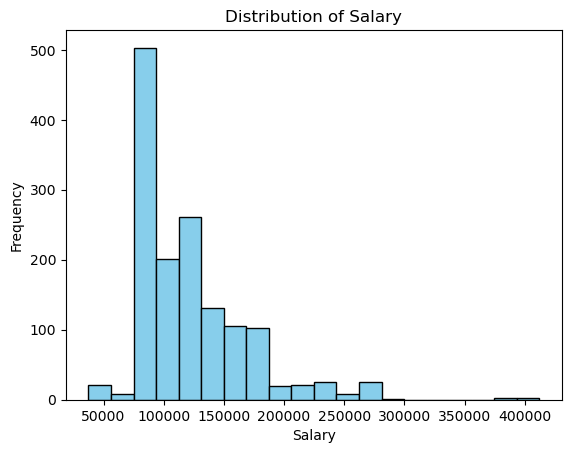

Rows with salary greater than 390000:
                                                  Title  \
1301                          Technical Product Manager   
1351  Technical Director, Machine Learning (Individu...   

                                            Description Company Name  \
1301  Technical Product Manager We could collect fee...    Anthropic   
1351  Technical Director, Machine Learning (Individu...       Roblox   

               City     State  Salary  Year  Month  Day  skill_keywords  \
1301  San Francisco  CA 94111  410000  2019      9   16               0   
1351      San Mateo  CA 94401  412050  2019      9   16               1   

      tool_keywords  total_keywords  
1301              0             NaN  
1351              0             NaN  
Rows with salary lower than 40000:


,Title,Description,Company Name,City,State,Salary,Year,Month,Day,skill_keywords,tool_keywords,total_keywords
1251,AI Training for Ukrainian Writers,AI Training for Ukrainian Writers Work on vari...,Scale AI,Remote in New York,NY,37440,2019,9,16,0,0,NaN
1364,AI Training for Greek Writers,AI Training for Greek Writers Work on various ...,Scale AI,Remote in San Francisco,CA,38376,2019,9,16,0,0,NaN


In [109]:
# Plot the histogram of the 'Salary' column
plt.hist(big_merged_df['Salary'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')

# Show the plot
plt.show()

# Assuming big_merged_df is your DataFrame

# Filter the DataFrame for rows with salary > 390000
high_salary_rows = big_merged_df[big_merged_df['Salary'] > 390000]
low_salary_rows = big_merged_df[big_merged_df['Salary'] < 40000]

# Print the rows with salary > 390000
print("Rows with salary greater than 390000:")
print(high_salary_rows)
print("Rows with salary lower than 40000:")
low_salary_rows